In [1]:
import cv2
from pathlib import Path
import pandas as pd
import numpy as np
from skimage.draw import polygon
import matplotlib.pyplot as plt
import torch
import sys
sys.path.insert(0, '../src')
import utils
import datasets.echonet_dyn
import unet.unet as unet

In [2]:
path_to_data_train = '/home/paul/Downloads/echonet_dynamic_preprocessed/TRAIN/'
path_to_data_val = '/home/paul/Downloads/echonet_dynamic_preprocessed/VAL/'
path_to_data_test = '/home/paul/Downloads/echonet_dynamic_preprocessed/TEST/'

# path_to_data_train = '/home/paul/Downloads/echonet_ped_preprocessed/TRAIN/'
# path_to_data_val = '/home/paul/Downloads/echonet_ped_preprocessed/VAL/'
# path_to_data_test = '/home/paul/Downloads/echonet_ped_preprocessed/TEST/'

In [3]:
loader_train = datasets.echonet_dyn.load_data_into_loader(6,path_to_data_train)
loader_val = datasets.echonet_dyn.load_data_into_loader(6,path_to_data_val)
loader_test = datasets.echonet_dyn.load_data_into_loader(6,path_to_data_test)

Number of samples: 6882
Number of samples: 1186
Number of samples: 1175


In [4]:
x, y = next(iter(loader_train))
x.shape, y.shape

(torch.Size([6, 1, 112, 112]), torch.Size([6, 112, 112]))

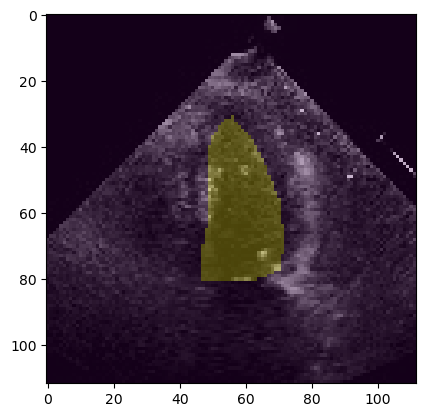

In [5]:
plt.imshow(x[4,0], cmap='gray')
plt.imshow(y[4], alpha=0.3)
plt.show()


In [6]:
model = unet.UNet(1,2)

In [7]:
optim = torch.optim.Adam(model.parameters(), lr=0.001)

In [8]:
unet.train_model(model, loader_train, loader_val, optim)

Epoch: 0


KeyboardInterrupt: 